### 1.0 About Dataset:

data:

https://docs.google.com/document/d/1f4e0LwHwiV4cLkxjxjPqwi1Ezwg_usZmeyZolrqtAM0/edit

fifa data:

https://www.kaggle.com/datasets/yagunnersya/fifa-21-messy-raw-dataset-for-cleaning-exploring/code

guide for data Cleaning:
https://www.kaggle.com/code/ibnsa3d/fifa-messy-full-data-cleaning

https://www.kaggle.com/code/imanezatfar/complete-fifa21-cleaning-analysis-11-insights




### 2.0 About data

In [54]:
# ID: Identificador único del jugador.
# Name: Nombre del jugador.
# LongName: Nombre completo del jugador.
# photoUrl: URL de la foto del jugador.
# playerUrl: URL del perfil del jugador en el sitio web de SoFIFA.
# Nationality: Nacionalidad del jugador.
# Age: Edad del jugador.
# ↓OVA: Calificación general del jugador (Overall rating).
# POT: Potencial del jugador (Potencial máximo que puede alcanzar).
# Club: Club en el que juega el jugador.
# Contract: Duración del contrato del jugador con su club.
# Positions: Posiciones en las que el jugador puede jugar.
# Height: Altura del jugador.
# Weight: Peso del jugador.
# Preferred Foot: Pie preferido del jugador (izquierdo o derecho).
# BOV: Mejor calificación del jugador en su posición más adecuada.
# Best Position: Mejor posición para el jugador según su desempeño.
# Joined: Fecha en que el jugador se unió a su club actual.
# Loan Date End: Fecha de fin del préstamo si el jugador está cedido.
# Value: Valor de mercado del jugador.
# Wage: Salario semanal del jugador.
# Release Clause: Cláusula de rescisión del contrato del jugador.
# Las siguientes columnas están relacionadas con las habilidades y características del jugador:

# Attacking: Habilidades de ataque (como Crossing, Finishing, etc.).
# Skill: Habilidades técnicas (como Dribbling, Curve, etc.).
# Movement: Atributos de movimiento (como Acceleration, Sprint Speed, etc.).
# Power: Atributos de potencia (como Shot Power, Jumping, etc.).
# Mentality: Atributos mentales (como Aggression, Interceptions, etc.).
# Defending: Atributos defensivos (como Marking, Standing Tackle, etc.).
# Goalkeeping: Atributos de portería (como GK Diving, GK Handling, etc.).
# Total Stats: Suma de todas las estadísticas del jugador.
# Base Stats: Estadísticas base del jugador.
# Además, hay columnas adicionales que indican habilidades específicas:

# W/F: Weak Foot (nivel de habilidad con el pie más débil).
# SM: Skill Moves (movimientos de habilidad).
# A/W: Attacking Work Rate (tasa de trabajo en ataque).
# D/W: Defensive Work Rate (tasa de trabajo en defensa).
# IR: International Reputation (reputación internacional).
# PAC: Pace (velocidad).
# SHO: Shooting (tiro).
# PAS: Passing (pase).
# DRI: Dribbling (regate).
# DEF: Defending (defensa).
# PHY: Physical (físico).
# Hits: Número de visitas en el perfil del jugador en SoFIFA.



### 3.0 Objetive

Inspiration
1. Do the height and weight columns have the appropriate data types?
2. Can you separate the joined column into year, month, and day columns?
3. Can you clean and transform the value, wage, and release clause columns into columns of integers?
4. How can you remove the newline characters from the Hits column?
5. Should you separate the Team & Contract column into separate team and contract columns?

### 4.0 Importing neccessary libraries

In [55]:
# For Data Manipulation
import pandas as pd
import numpy as np
# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For Missing Values Imputation
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# For Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### 5.0 Settings

In [56]:
# Ajustar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### 6.0 Cargar Dataset

In [57]:
df = pd.read_csv("fifa_data.csv", low_memory=False)


### 7.0 Overview del dataset

In [58]:
df.head()


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [59]:
df.tail()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,CB,178cm,66kg,Right,49,CB,"Jul 13, 2018",NaN,€100K,€1K,€70K,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2 ★,2★,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,CM,175cm,65kg,Right,51,CAM,"Aug 1, 2020",NaN,€130K,€500,€165K,211,38,42,40,56,35,219,46,40,35,50,48,305,63,64,61,51,66,226,48,58,43,47,30,193,40,23,47,47,36,38,116,32,44,40,45,12,10,9,6,8,1315,281,2 ★,2★,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,2019 ~ 2020,CM,179cm,74kg,Right,49,CAM,"Mar 8, 2019",NaN,€120K,€500,€131K,200,30,34,43,54,39,207,43,39,31,47,47,290,59,66,51,47,67,242,45,52,50,54,41,230,56,42,47,43,42,43,121,33,43,45,48,13,12,6,6,11,1338,285,2 ★,2★,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,2020 ~ 2022,RW,175cm,69kg,Right,48,ST,"Sep 22, 2020",NaN,€100K,€2K,€88K,215,45,52,34,42,42,194,51,35,31,31,46,254,62,55,50,33,54,235,56,45,46,48,40,190,31,25,42,46,46,45,100,26,32,42,55,14,12,9,8,12,1243,271,3 ★,2★,Medium,Medium,1 ★,58,49,41,49,30,44,NaN
18978,252520,Zhou Xiao,Xiao Zhou,https://cdn.sofifa.com/players/252/520/21_60.png,http://sofifa.com/player/252520/xiao-zhou/210006/,China PR,21,47,57,\n\n\n\nDalian YiFang FC,2019 ~ 2023,"CB, LB",188cm,75kg,Left,50,LB,"Jul 29, 2019",NaN,€100K,€1K,€79K,163,40,18,40,45,20,171,40,33,20,40,38,279,60,63,57,47,52,231,37,66,60,55,13,185,45,47,33,33,27,33,136,45,46,45,50,10,11,7,10,12,1215,265,3 ★,2★,Medium,Medium,1 ★,62,22,39,42,45,55,NaN


In [60]:
# Cantidad de filas y columnas
df.shape

(18979, 77)

In [61]:
# Informacion de las columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [62]:
# Resumen Estadístico

df.describe()

,ID,Age,↓OVA,POT,BOV,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.00000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000,18979.000000
mean,226403.384794,25.194109,65.718636,71.136414,66.751726,248.938142,49.688392,45.842405,51.942726,58.768112,42.696507,256.479214,55.587491,47.246957,42.391011,52.725381,58.528373,317.718689,64.357553,64.412930,63.366721,61.655619,63.925865,296.605195,57.801676,64.577375,62.653986,64.786922,46.785236,254.199747,55.591285,46.394489,50.298962,53.857105,48.057906,58.07366,139.909268,46.559197,47.705622,45.644449,81.436693,16.416302,16.207124,16.076453,16.217187,16.519627,1595.286949,355.702197,67.453975,53.457031,57.681016,62.875020,49.866221,64.368934
std,27141.054157,4.710520,6.968999,6.114635,6.747193,74.299428,18.131153,19.567081,17.294409,14.519106,17.646937,78.650601,18.761314,18.207790,17.227947,15.178151,16.565892,55.879046,14.889981,14.638743,14.596277,9.072114,14.062285,50.732390,13.308747,11.844870,15.804223,12.488672,19.300534,64.595613,17.140414,20.698078,19.428701,13.708574,15.655999,12.07911,61.219472,20.139324,21.367690,20.922087,84.665579,17.554194,16.816305,16.491103,17.002239,17.854079,269.874789,40.761117,10.677859,13.827425,10.081857,9.927415,16.443213,9.601883
min,41.000000,16.000000,47.000000,47.000000,48.000000,42.000000,6.000000,3.000000,5.000000,7.000000,3.000000,40.000000,5.000000,4.000000,5.000000,5.000000,5.000000,122.000000,13.000000,12.000000,14.000000,24.000000,12.000000,122.000000,18.000000,15.000000,12.000000,16.000000,4.000000,50.000000,9.000000,3.000000,2.000000,9.000000,6.000000,12.00000,20.000000,3.000000,5.000000,4.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.000000,747.000000,232.000000,25.000000,16.000000,25.000000,25.000000,12.000000,28.000000
25%,210135.000000,21.000000,61.000000,67.000000,62.000000,222.000000,38.000000,30.000000,44.000000,54.000000,30.000000,222.000000,49.000000,35.000000,31.000000,43.000000,54.000000,289.000000,57.000000,57.000000,55.000000,56.000000,56.000000,264.000000,48.000000,58.000000,55.000000,57.000000,32.000000,227.500000,44.000000,25.000000,40.000000,45.000000,39.000000,50.00000,83.000000,29.000000,27.000000,25.000000,48.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1452.000000,327.000000,61.000000,44.000000,51.000000,57.000000,35.000000,58.000000
50%,232418.000000,25.000000,66.000000,71.000000,67.000000,263.000000,54.000000,49.000000,55.000000,62.000000,44.000000,269.000000,61.000000,49.000000,41.000000,56.000000,63.000000,327.000000,67.000000,67.000000,66.000000,62.000000,66.000000,302.000000,59.000000,65.000000,66.000000,66.000000,51.000000,263.000000,58.000000,53.000000,55.000000,55.000000,49.000000,59.00000,159.000000,52.000000,55.000000,52.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1627.000000,356.000000,68.000000,56.000000,58.000000,64.000000,53.000000,65.000000
75%,246922.500000,29.000000,70.000000,75.000000,71.000000,297.

In [63]:

df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [64]:
df.rename(columns={'↓OVA': 'OVA'}, inplace=True)

### 8.0 Data Cleaning

#### 8.1 Mising Values

In [65]:
# Porcentajes de valores faltantes por columna

(df.isnull().sum()/len(df)*100).sort_values(ascending=False).head(10)

Loan Date End    94.662522
Hits             13.673007
LongName          0.000000
Name              0.000000
ID                0.000000
Nationality       0.000000
Age               0.000000
OVA               0.000000
POT               0.000000
Club              0.000000
dtype: float64

<Axes: >

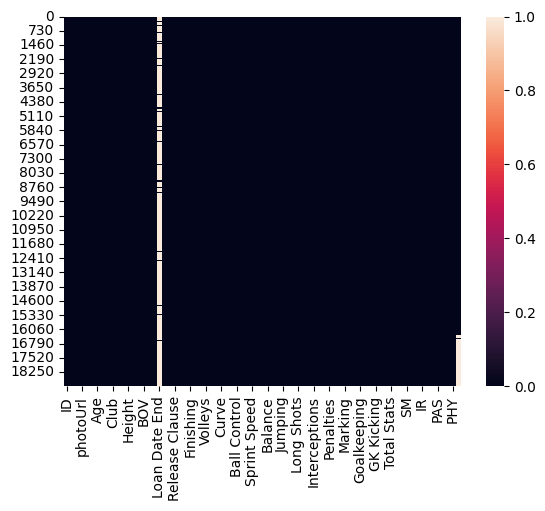

In [66]:
# Heatmap For Missing Values
sns.heatmap(df.isnull())


As NULL Loan Date End values means player was not on Loan, So we will fill it with "Not Present".
El valor nulo indica que los jugadores no estan en condicion de prestamo, por lo que procedemos a imputar por "Not present"

In [67]:
df["Loan Date End"].fillna("Not Present",inplace=True)

#### 8.2 Duplicates Treatment

In [68]:
# Checking Number of Duplicates
df.duplicated().sum()

np.int64(0)

#### Tratamiento de duplicados por la Columna 'LongName'

In [69]:
# En df_d tenemos solo las filas que tienen mas de una ocurrencia 
#df_d = df[df.duplicated(subset=['LongName'], keep=False)].sort_values(by='Name')
# Agrupar por 'LongName' y obtenemos el índice de las filas con el valor máximo en 'Age'
#idx_max = df_d.groupby('LongName')['Age'].idxmax()
# Con los indices obteninos recuperamos la columna ID
#idx_max = df_d.loc[idx_max,['ID']]
# En df_d eliminamos aquellas filas que no son los los max por grupos, es decir eliminamos los duplicados 
#idx_a_eliminar = df_d[~df_d['ID'].isin(idx_max['ID'])]
# Dado que df_d solo era una parte del dataframe ahora podemos eliminar los duplicados en el resto de la data a través de los indices recuperados 
#idx_a_eliminar  = idx_a_eliminar[['ID']]
# Finalmente eliminamos los indices de las filas que no son las max de la columna age por group de LongName y reseteamos los indices para que no quede rastro de los datos faltantes
#df = df[~df['ID'].isin(idx_a_eliminar['ID'])].reset_index()
#df

       

#### 8.3 Inconsistencies Treatment

#### Columna Height a cm 


In [70]:
# Revision de valores nulos 
df['Height'].isna().sum()

np.int64(0)

In [71]:
# Extraer todos los valores no numéricos únicos de la columna 'Height' para asegurarse de que hay distintas medidas
mesure_Height_Type = df['Height'].str.extractall('([^\d]+)')[0].unique()

mesure_Height_Type


array(['cm', "'", '"'], dtype=object)

In [72]:
# Filtrar filas que contienen feet and inches en la columna 'Height'
df_feet_and_inches = df[df['Height'].str.contains(r"['\"]", regex=True)]['Height']
# Filtrar filas que contienen "cm" en la columna 'Height'
df_cm = df[df['Height'].str.contains(r'cm', regex=True)]['Height']

print(f"Cantidad de filas en cm : {len(df_cm)}")
print(f"Cantidad de filas en feet and inches: {len(df_feet_and_inches)}")
print(f"Cantidad total de filas y la sumatoria de filas en cm y en feet e inches: {len(df_feet_and_inches)+len(df_cm)}")
print(f"Cantidad total de filas total: {len(df['Height'])}")



Cantidad de filas en cm : 18939
Cantidad de filas en feet and inches: 40
Cantidad total de filas y la sumatoria de filas en cm y en feet e inches: 18979
Cantidad total de filas total: 18979


In [73]:
def converting_to_cm(height):
    if isinstance(height, str):  # Check if height is a string
        if 'cm' in height:
            return float(height.replace('cm', '').strip())
        elif "'" in height and '"' in height:
            # Extract feet and inches
            feet, inches = height.split("'")
            inches = inches.replace('"', '').strip()  # Remove the quotation mark
            feet = float(feet.strip())
            inches = float(inches)
            # Convert feet and inches to cm
            return (feet * 12 + inches) * 2.54
        else:
            return np.nan
    elif isinstance(height, (int, float)): # Handle cases where height is already numeric
        return height 
    else:
        return np.nan

In [74]:
df['Height'] = df['Height'].apply(converting_to_cm)


# Cambiamos el tipo de dato de la columna a entero 

df['Height(cm)'] = df['Height'].astype(int)

# Eliminamos la anterior columna para dejar solo aquella en cm 
df = df.drop('Height', axis=1)




#### Columna Weight a kg

In [75]:
# Extraer todos los valores no numéricos únicos de la columna 'Height' para asegurarse de que hay distintas medidas
mesure_Weight_Type = df['Weight'].str.extractall('([^\d]+)')[0].unique()

mesure_Weight_Type


array(['kg', 'lbs'], dtype=object)

In [76]:
# Filtrar filas que esten en lbs en la columna 'Weight'
df_lbs = df[df['Weight'].str.contains(r"lbs", regex=True)]['Weight']
# Filtrar filas que contienen "kg" en la columna 'Weight'
df_kg = df[df['Weight'].str.contains(r'kg', regex=True)]['Weight']



print(f"Cantidad de filas en lbs: {len(df_lbs)}")
print(f"Cantidad de filas en kg: {len(df_kg)}")
print(f"Cantidad total de filas y la sumatoria de filas en kg y en lbs: {len(df_kg)+len(df_lbs)}")
print(f"Cantidad total de filas total: {len(df['Weight'])}")


Cantidad de filas en lbs: 40
Cantidad de filas en kg: 18939
Cantidad total de filas y la sumatoria de filas en kg y en lbs: 18979
Cantidad total de filas total: 18979


In [77]:
# Funcion a aplicar para aquellas filas en lbs
def converting_to_kg (x):
    num = x.replace('lbs', '')
    return float(num) * 0.453592

In [78]:
# Eliminamos "kg" de la columna 

df['Weight'] = df['Weight'].str.replace(r'kg', '', regex=True)

# Extraer los índices de aquellas filas que estan en lbs

indices = df_lbs.index.tolist()

# Aplicar una función lambda solo a las filas de esos índices

df.loc[indices,'Weight'] = df.loc[indices, 'Weight'].apply(lambda x: converting_to_kg(str(x)))

# Cambiamos el tipo de dato de la columna a entero 

df['Weight(kg)'] = df['Weight'].astype(int)

# Eliminamos la anterior columna para dejar solo aquella en cm 

df = df.drop('Weight', axis=1)


### Columna Joined a datetime

In [79]:
df['Joined'].isnull().sum()

np.int64(0)

In [80]:
df['Joined'].sample(5)

16321     Nov 2, 2019
10226     Aug 1, 2019
10738     Jan 8, 2020
13297    Jul 26, 2019
2917     Jan 30, 2019
Name: Joined, dtype: object

In [81]:
# Converting Joined o Datetime
df["Joined"]=pd.to_datetime(df["Joined"],format="%b %d, %Y")

In [82]:
# Creamos las columnas dia, mes y año para el dataframe

df["Joined.year"] = df["Joined"].dt.year
df["Joined.month"] = df["Joined"].dt.month
df["Joined.day"] = df["Joined"].dt.day

df[["Joined.year","Joined.month","Joined.day","Joined"]].sample(5)

,Joined.year,Joined.month,Joined.day,Joined
5493,2019,7,1,2019-07-01
12316,2018,8,30,2018-08-30
15261,2010,1,6,2010-01-06
17064,2019,8,3,2019-08-03
9665,2019,1,29,2019-01-29


In [83]:
df_ = df[['Name','Wage']]
df_.to_csv('df.csv')

#### Columna Value, Wage and ReleaseClause

In [84]:
df[['Value','Wage','Release Clause']].sample(5)

,Value,Wage,Release Clause
17180,€375K,€600,€417K
12937,€700K,€2K,€653K
16566,€425K,€550,€261K
777,€16.5M,€51K,€19.3M
10852,€190K,€750,€203K


In [85]:
# Revisamos los tipos de caracteres presentes en las columnas

wage_ch = df['Wage'].str.extractall('([^\d]+)')[0].unique()
value_ch = df['Value'].str.extractall('([^\d]+)')[0].unique()
releaseClause_ch = df['Release Clause'].str.extractall('([^\d]+)')[0].unique()

print(f"Caracteres en la columna Wage: {wage_ch}")
print(f"Caracteres en la columna Value: {value_ch}")
print(f"Caracteres en la columna Release Clause: {releaseClause_ch}")

Caracteres en la columna Wage: ['€' 'K']
Caracteres en la columna Value: ['€' '.' 'M' 'K']
Caracteres en la columna Release Clause: ['€' '.' 'M' 'K']


In [86]:
# Eliminamos el caracter € de todas las columnas 
# Tengo que usar .str.replace porque el euro es una subcadena 
#        Usa df['columna'].replace() para reemplazar valores EXACTOS en cualquier tipo de datos.
#        Usa df['columna'].str.replace() cuando quieras reemplazar subcadenas dentro de cadenas de texto o cuando necesites usar expresiones regulares.
df['Wage'] = df['Wage'].str.replace('€','')
df['Value'] = df['Value'].str.replace('€','')
df['Release Clause'] = df['Release Clause'].str.replace('€','')


In [87]:
def converting_money(x):
    # Comprobar si el valor es nulo
    if pd.isnull(x):
        return x  # Si es nulo, devolver el valor nulo (NaN o None)
    
    # Si contiene 'M', multiplicar por 1 millón
    if 'M' in x:
        x = x.replace('M', '')  
        total = 1000000 * float(x)  
    
    # Si contiene 'K', multiplicar por 1000
    elif 'K' in x:
        x = x.replace('K', '')  
        total = 1000 * float(x)  
    
    # Si no contiene 'M' ni 'K', convertir directamente a float
    else:
        total = float(x)
    
    return total

In [88]:
def values_numeric(value):
    if isinstance(value, str):
        # Remove '€' and ',' characters, and convert to lowercase
        value = value.lower().replace('€', '').replace(',', '')
        
        # Convert 'm' for million and 'k' for thousand to numeric
        if 'm' in value:
            return float(value.replace('m', '').strip()) * 1000000  # Replace lowercase 'm'
        elif 'k' in value:
            return float(value.replace('k', '').strip()) * 1000
        else:
            return float(value)
    return np.nan  # Return NaN for missing or unexpected formats

In [89]:
def unitless_values(values):
    if isinstance(values, str):
        # Remove all potential currency symbols
        values = values.replace('€', '').replace('$', '').replace('£', '').strip() 
    return values

In [90]:
# Aplicamos la funcion para la modificacion de los datos monetarios

df['Wage'] = df['Wage'].apply(lambda x: converting_money(str(x)))
df['Value'] = df['Value'].apply(lambda x: converting_money(str(x)))
df['Release Clause'] = df['Release Clause'].apply(lambda x: converting_money(str(x)))



In [91]:
# Transformamos el tipo de datos en int

df['Wage'] = df['Wage'].astype(int)
df['Value'] = df['Value'].astype(int)
df['Release Clause'] = df['Release Clause'].astype(int)

### Columna Hits

In [92]:
df['Hits'].isnull().sum()

np.int64(2595)

In [93]:
df['Hits'].dtype

dtype('O')

In [94]:
ind = df['Hits'].sample(25).index.tolist()

df['Hits'].loc[ind]

4830       4
5426      68
11541      2
17020    NaN
9858       7
6130       2
8540       4
680       15
1140      20
10209      6
6336       2
7080      19
2465      34
5211       4
1945     165
1776     206
5179      27
11658      1
15836      5
7762      28
1450     414
8034       3
9114       7
9886       2
14460      1
Name: Hits, dtype: object

In [95]:
# Caracteres en la columna Hits

hits_ch= df['Hits'].str.extractall('([^\d]+)')[0].unique()
hits_ch

array(['.', 'K'], dtype=object)

In [96]:
# Transformamos los datos en formato K y luego pasamos la columna a tipo int

df['Hits'] = df['Hits'].apply(lambda x: converting_money(x))


In [97]:
# Imputation
#Este código usa el IterativeImputer para realizar una imputación avanzada de valores faltantes en la columna "Hits", 
# donde los valores faltantes son estimados utilizando un enfoque iterativo y predictivo.
imputer=IterativeImputer()
df["Hits"]=imputer.fit_transform(df[["Hits"]])
df['Hits'] = df['Hits'].astype(int)

In [98]:
df['Hits'].loc[ind]

4830       4
5426      68
11541      2
17020     26
9858       7
6130       2
8540       4
680       15
1140      20
10209      6
6336       2
7080      19
2465      34
5211       4
1945     165
1776     206
5179      27
11658      1
15836      5
7762      28
1450     414
8034       3
9114       7
9886       2
14460      1
Name: Hits, dtype: int64

### 9.0 Validacion

In [99]:
df.dtypes

ID                           int64
Name                        object
LongName                    object
photoUrl                    object
playerUrl                   object
Nationality                 object
Age                          int64
OVA                          int64
POT                          int64
Club                        object
Contract                    object
Positions                   object
Preferred Foot              object
BOV                          int64
Best Position               object
Joined              datetime64[ns]
Loan Date End               object
Value                        int64
Wage                         int64
Release Clause               int64
Attacking                    int64
Crossing                     int64
Finishing                    int64
Heading Accuracy             int64
Short Passing                int64
Volleys                      int64
Skill                        int64
Dribbling                    int64
Curve               

In [100]:
df.isnull().sum()

ID                  0
Name                0
LongName            0
photoUrl            0
playerUrl           0
Nationality         0
Age                 0
OVA                 0
POT                 0
Club                0
Contract            0
Positions           0
Preferred Foot      0
BOV                 0
Best Position       0
Joined              0
Loan Date End       0
Value               0
Wage                0
Release Clause      0
Attacking           0
Crossing            0
Finishing           0
Heading Accuracy    0
Short Passing       0
Volleys             0
Skill               0
Dribbling           0
Curve               0
FK Accuracy         0
Long Passing        0
Ball Control        0
Movement            0
Acceleration        0
Sprint Speed        0
Agility             0
Reactions           0
Balance             0
Power               0
Shot Power          0
Jumping             0
Stamina             0
Strength            0
Long Shots          0
Mentality           0
Aggression

### 10.0 Insights

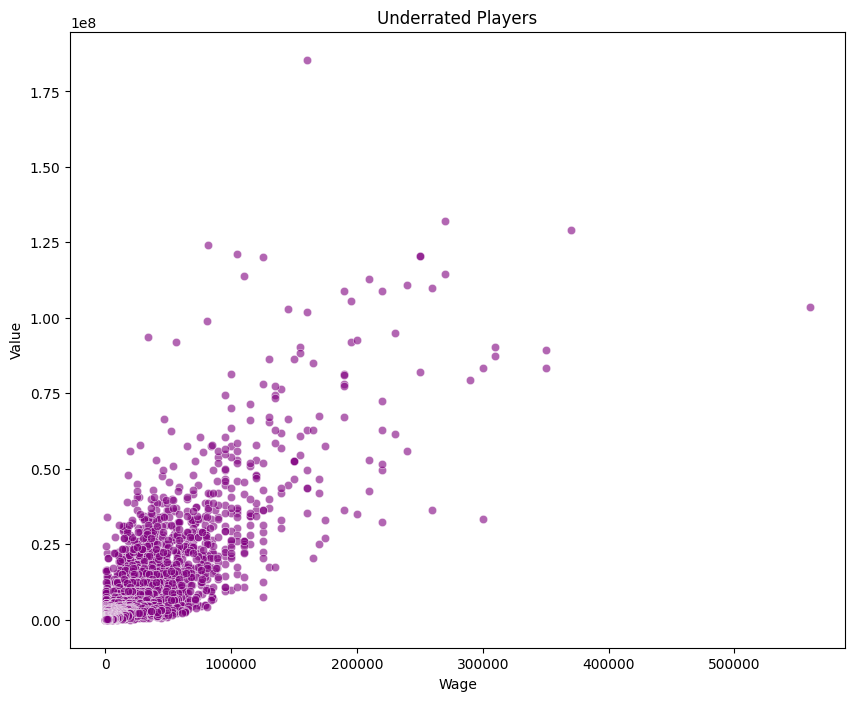

In [101]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Wage', y = 'Value', data = df, alpha = 0.6, color = 'purple')
plt.title('Underrated Players')
plt.xlabel('Wage')
plt.ylabel('Value')
plt.show()

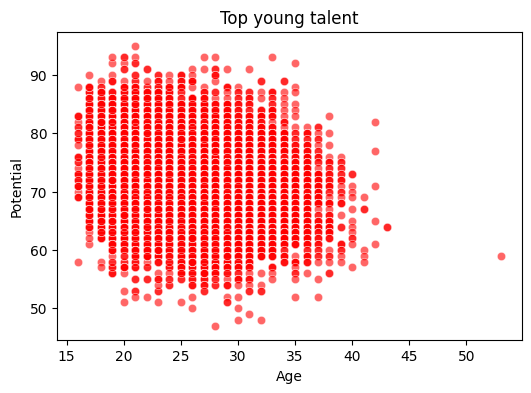

In [102]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Age', y = 'POT', data = df, alpha = 0.6, color = 'Red')
plt.title('Top young talent')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.show()

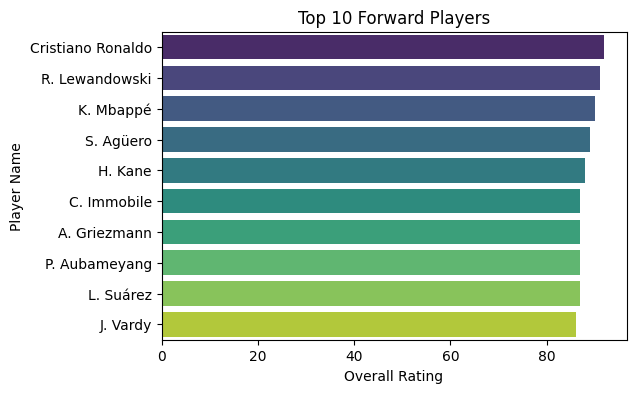

In [103]:
df['Primary Position'] = df['Positions'].apply(lambda x: x.split(',')[0])  # Choose the first position as primary
top_forwards = df[df['Primary Position'] == 'ST'].sort_values(by='OVA', ascending=False).head(10)

plt.figure(figsize=(6,4))
sns.barplot(x = "OVA", y = "Name", data = top_forwards, palette = "viridis")
plt.title('Top 10 Forward Players')
plt.xlabel('Overall Rating')
plt.ylabel('Player Name')
plt.show()

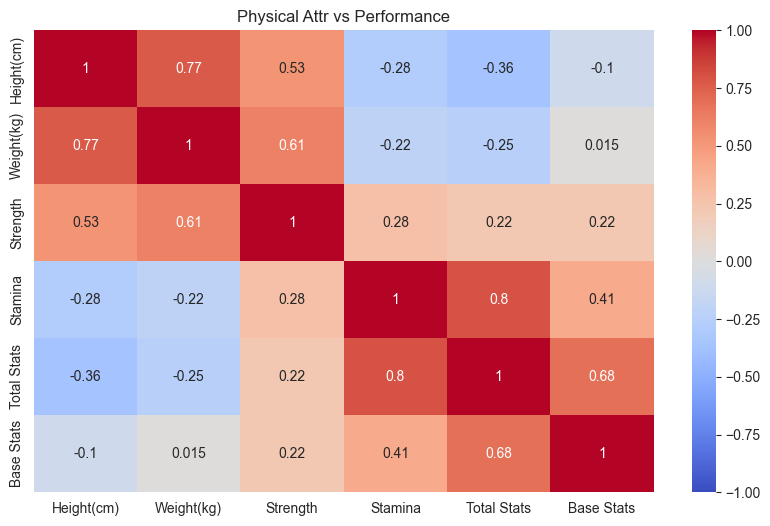

In [1327]:
columns_of_interest = ['Height(cm)', 'Weight(kg)', 'Strength', 'Stamina', 'Total Stats', 'Base Stats']
df_selected = df[columns_of_interest]
correlation_matrix = df_selected.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.title('Physical Attr vs Performance')
plt.show()

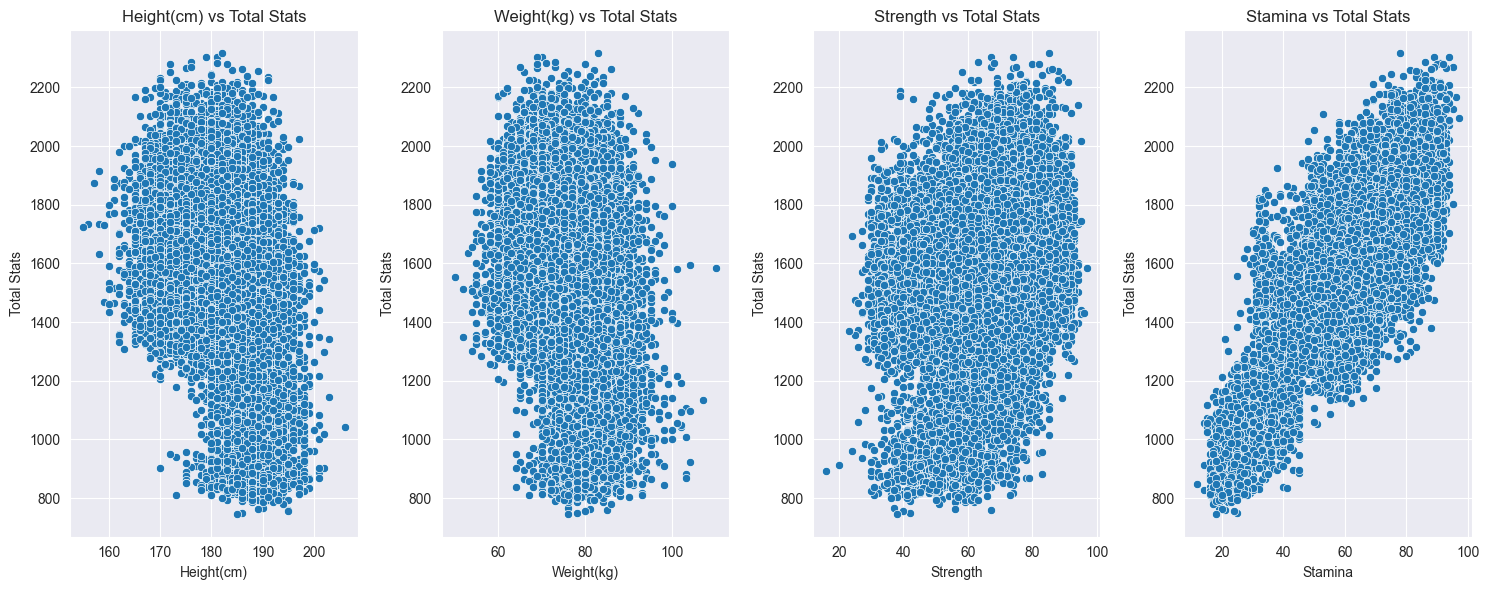

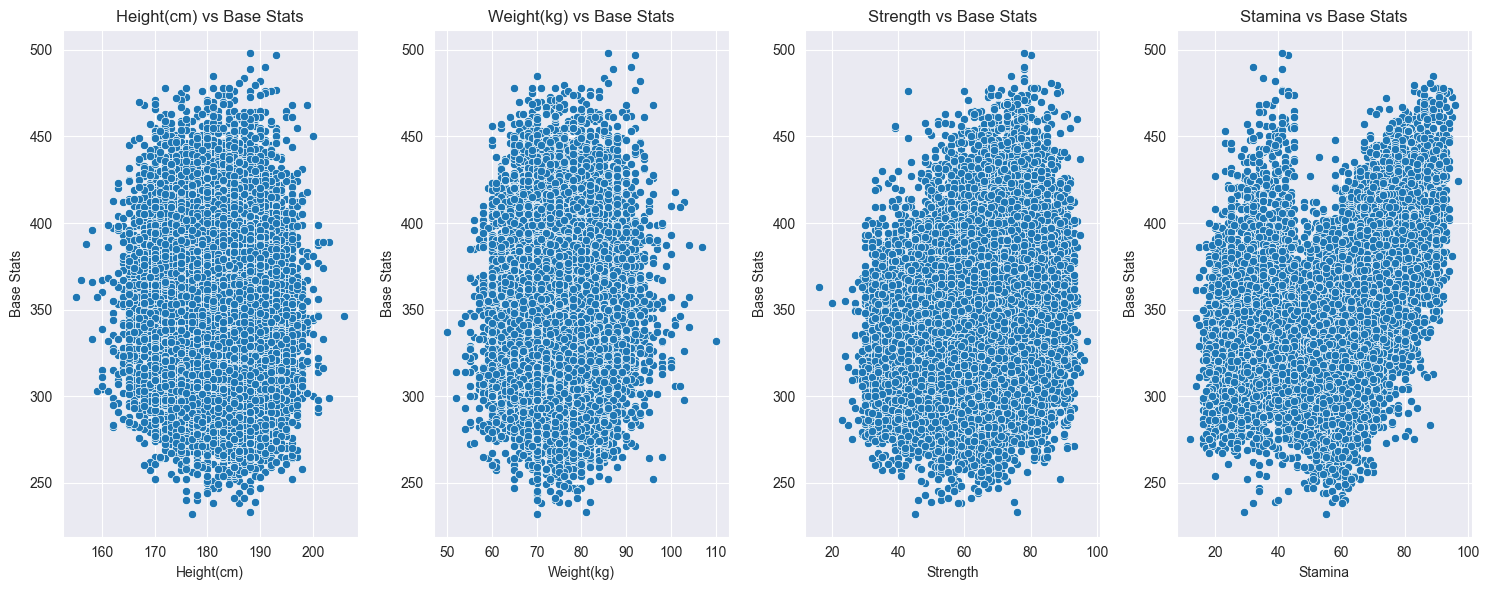

In [1329]:
correlations_total_stats = df_selected.corr()['Total Stats']
correlations_base_stats = df_selected.corr()['Base Stats']
plt.figure(figsize=(15, 6))

for i, column in enumerate(['Height(cm)', 'Weight(kg)', 'Strength', 'Stamina'], 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=df_selected, x=column, y='Total Stats')
    plt.title(f'{column} vs Total Stats')
    plt.xlabel(column)
    plt.ylabel('Total Stats')

plt.tight_layout()
plt.show()

# Plot correlations with 'Base Stats'
plt.figure(figsize=(15, 6))

for i, column in enumerate(['Height(cm)', 'Weight(kg)', 'Strength', 'Stamina'], 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(data=df_selected, x=column, y='Base Stats')
    plt.title(f'{column} vs Base Stats')
    plt.xlabel(column)
    plt.ylabel('Base Stats')

plt.tight_layout()
plt.show()

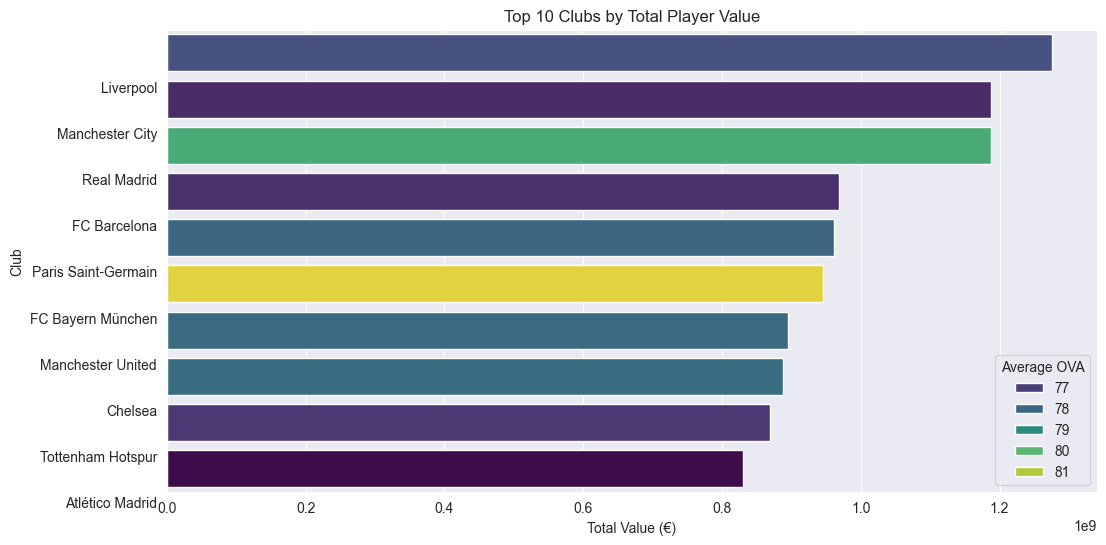

In [105]:
# Group data by Club and calculate total Value, total Wage, and average OVA
club_stats = df.groupby('Club').agg({
    'Value' : 'sum',
    'Wage' : 'sum',
    'OVA' : 'mean' 
}).reset_index()

# Rename columns for clarity
club_stats.rename(columns = {
    'Value' : 'Total Value(€)',
    'Wage' : 'Total Wage(€)',
    'OVA' : 'Average OVA'
}, inplace = True)

# Display the top 10 clubs by Total Value
club_stats.sort_values(by = 'Total Value(€)', ascending = False ).head(10)
top_clubs = club_stats.sort_values(by='Total Value(€)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Value(€)', y='Club', data=top_clubs, palette='viridis', hue='Average OVA', dodge=False)

# Adding titles and labels
plt.title('Top 10 Clubs by Total Player Value')
plt.xlabel('Total Value (€)')
plt.ylabel('Club')
plt.legend(title='Average OVA', loc='lower right')

plt.show()

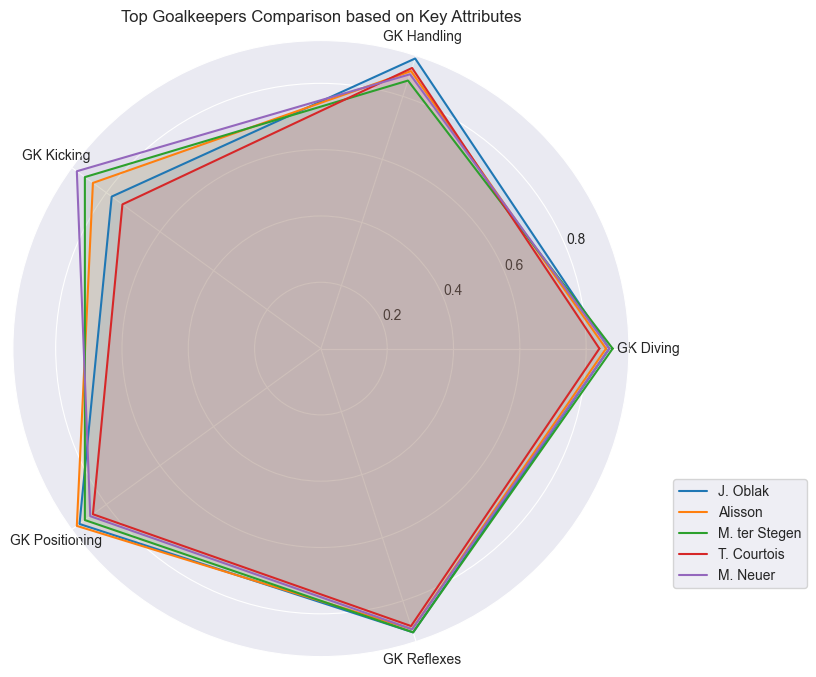

In [106]:
from math import pi

goalkeepers = df[df['Positions'].str.contains('GK')]

# Select relevant columns for goalkeepers
gk_attributes = ['Name', 'OVA', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
goalkeepers = goalkeepers[gk_attributes]

# Sort goalkeepers by their overall rating and select top N (e.g., top 5)
top_goalkeepers = goalkeepers.sort_values('OVA', ascending=False).head(5)

# Prepare data for radar chart

# Normalize the data to a 0-1 scale for visualization
top_goalkeepers_normalized = top_goalkeepers.copy()
attributes = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
for attr in attributes:
    top_goalkeepers_normalized[attr] = top_goalkeepers_normalized[attr] / 100

# Plotting radar chart


# Set up the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Define the angles for the radar chart
categories = attributes
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # Repeat the first angle to close the circle

# Plot each goalkeeper
for i, row in top_goalkeepers_normalized.iterrows():
    values = row[attributes].tolist()
    values += values[:1]  # Repeat the first value to close the circle
    ax.plot(angles, values, label=row['Name'])
    ax.fill(angles, values, alpha=0.1)

# Add labels and title
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Top Goalkeepers Comparison based on Key Attributes')
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.1))

# Show the radar chart
plt.show()